In [12]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

data = pd.read_csv('/home/steve/Vorlesungen/Artificial_Intelligence_Burghart/beer bottle detection/RKIM_KI_project/test_hu_cap_1.csv')
data

,hu0,hu1,hu2,hu3,hu4,hu5,hu6,label
0,2.481825,5.102957,9.721388,10.060755,19.964171,12.624585,20.580610,1
1,2.464062,5.167005,8.783634,8.780148,17.562730,11.364298,18.810961,1
2,3.051536,7.042201,10.212635,10.384344,21.030468,14.300026,20.731754,1
3,2.473533,5.188673,8.672346,8.672464,17.345199,11.267054,18.754467,1
4,2.546490,5.240165,9.883831,10.102699,20.096650,12.723635,21.346611,1
...,...,...,...,...,...,...,...,...
117,2.464470,5.058444,9.279847,9.399442,18.739181,11.930460,20.418536,2
118,2.488243,5.228020,8.646170,8.648971,17.298257,11.264751,18.348587,2
119,2.489293,5.113263,9.413508,9.549020,19.030299,12.107859,21.117558,2
120,2.486231,5.220695,8.654873,8.670060,17.333788,11.281707,18.450918,2


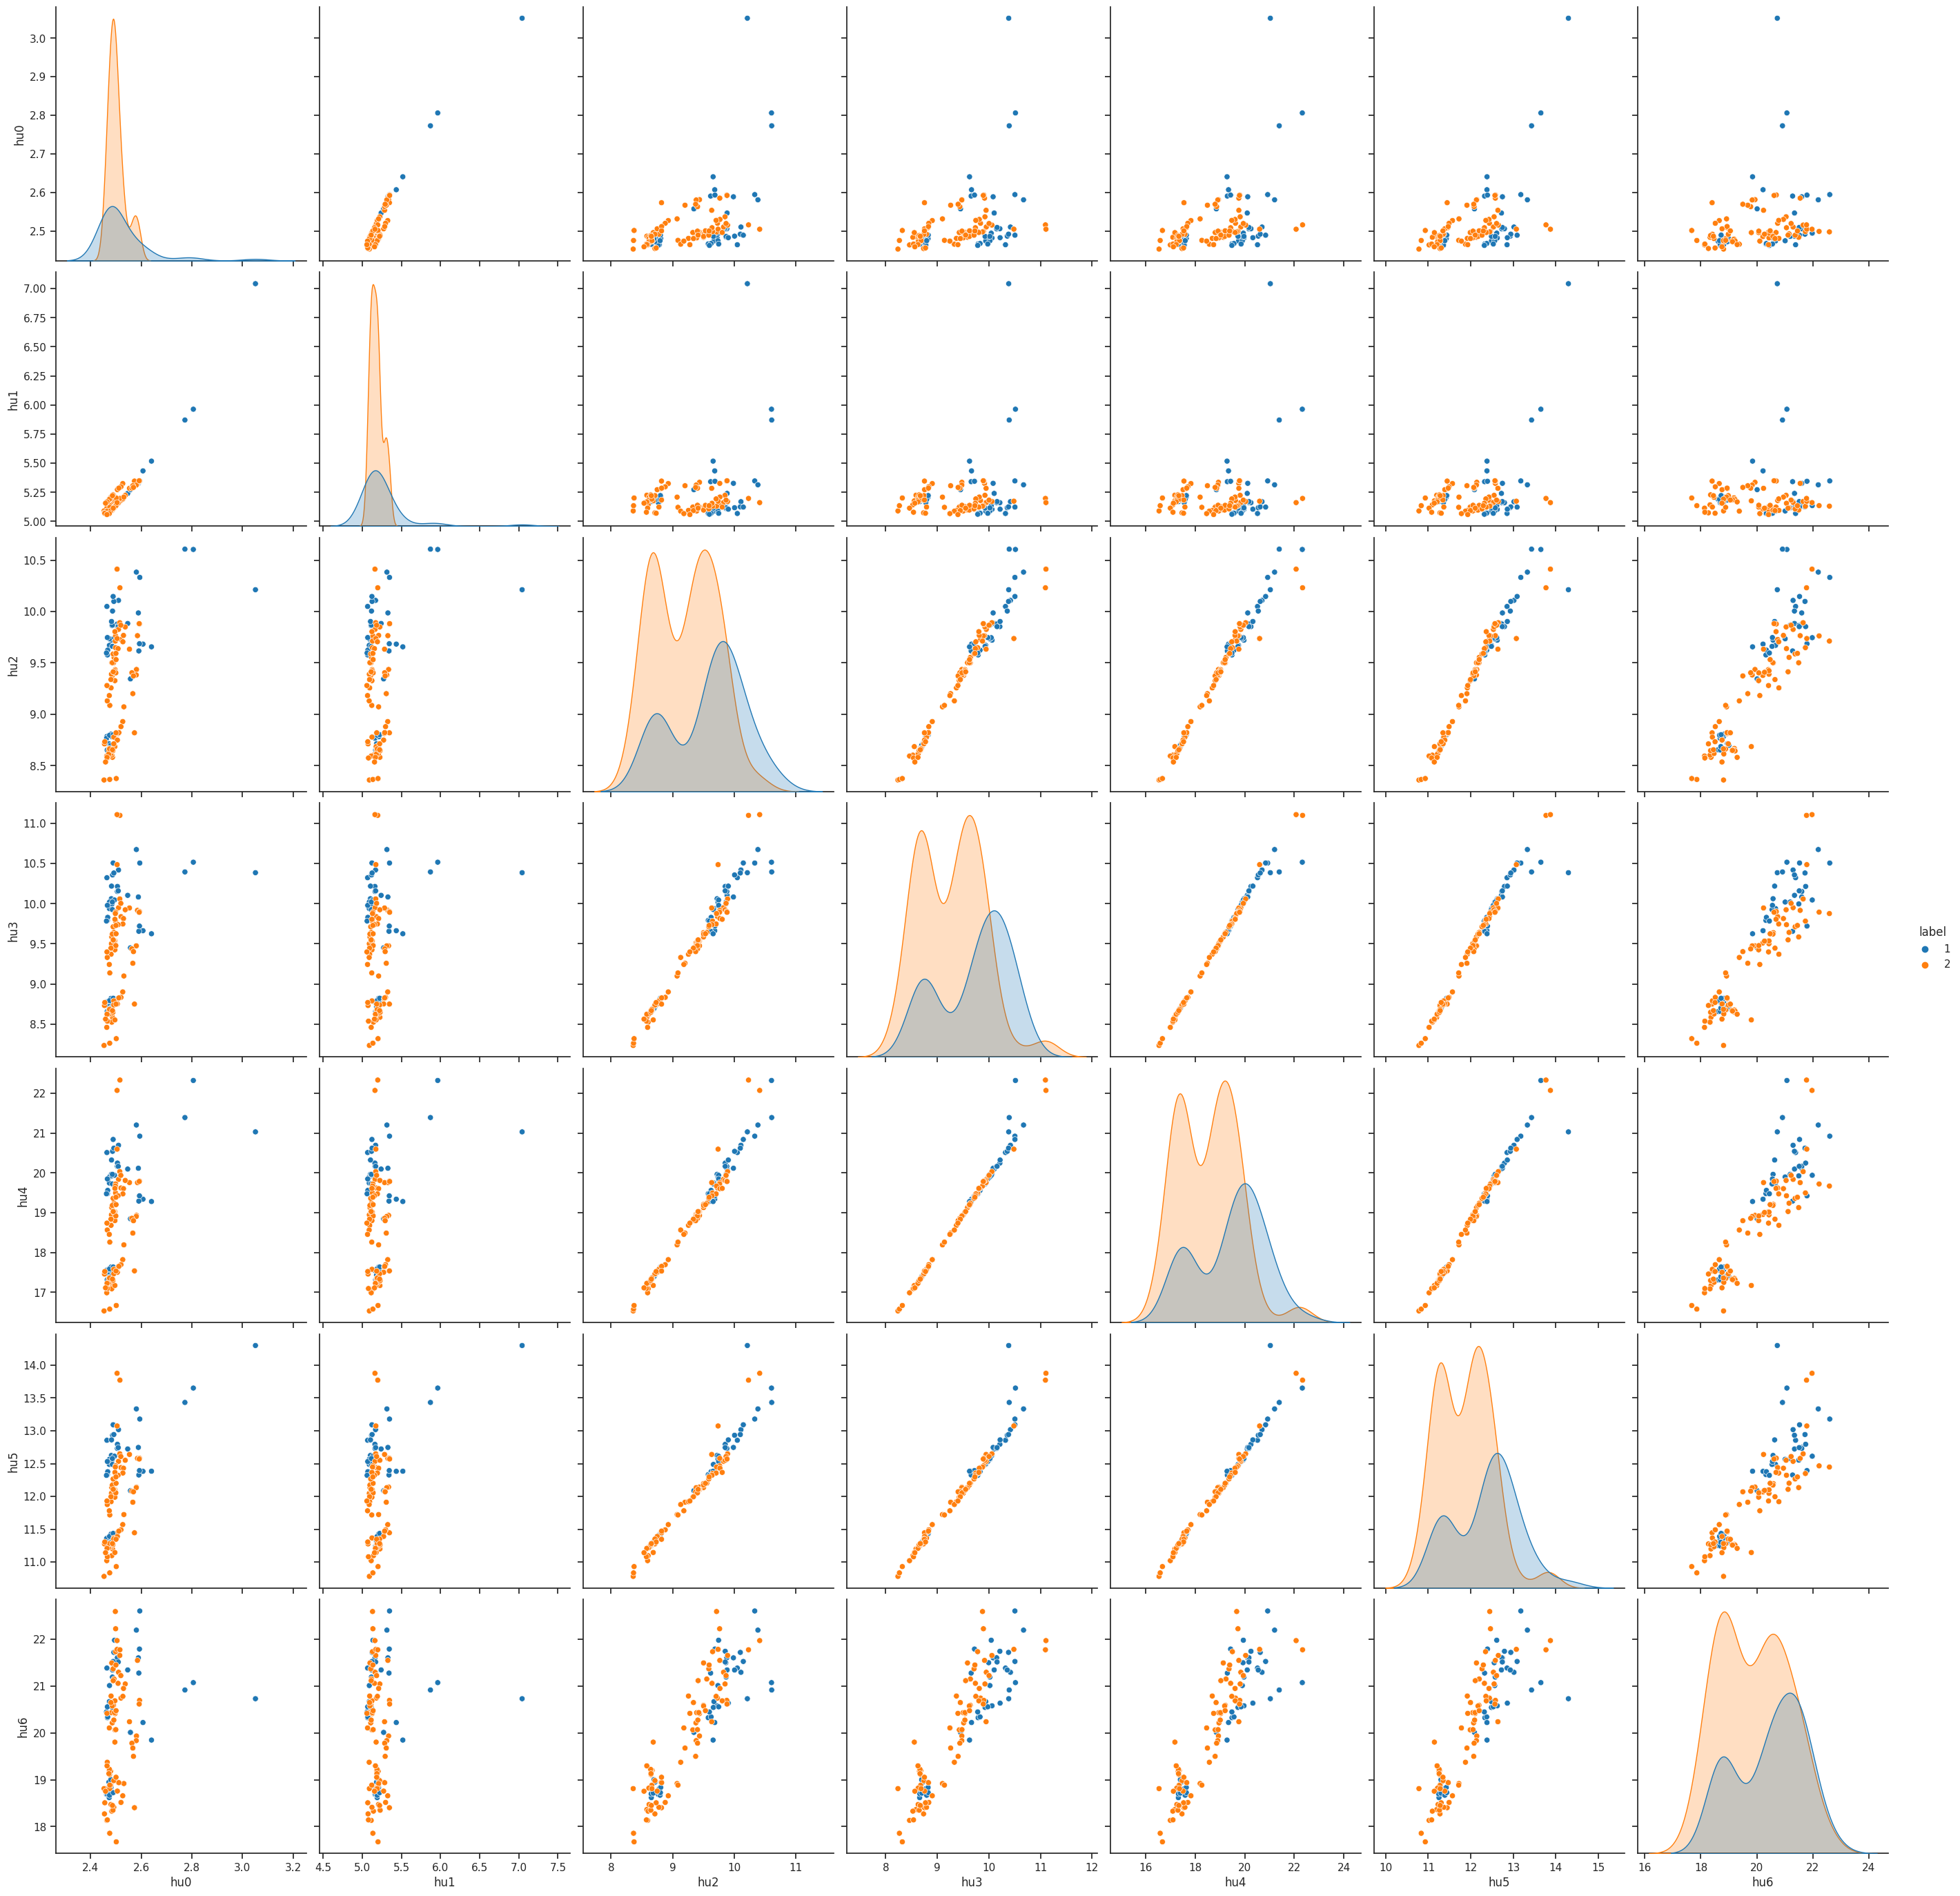

In [15]:
#data.plot.scatter(x='hu0',y='label')

sns.set_theme(style="ticks")
plot_kws = sns.pairplot(data, hue ="label",palette="tab10", height= 4)
plot_kws = {"s": 3}